## Group No -> 23

## Group Member Details:
| Sr.No | Student Name | Student ID |
| --- | --- | --- |
| 1 | SUNRIT PAL | 2021SC04088|
| 2 | HARMANAN GURVINDER KOHLI | 2021SC04823 |
| 3 | SURVE BHAKTI PRAKASH SMITA | 2021SC04075 |
| 4 | TRIVEDI TEJAS ATUL KAPILA | 2021SC04267 |


# 1. Import the required libraries

In [1]:
##---------Type the code below this line------------------##
import tensorflow as tf   # we have used tensorflow==2.10.0
import random
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Flatten , Dense , Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras import regularizers
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
# Setting the seeds so that the results are reproducible
random.seed(42)
np.random.seed(42)

# 2. Data Acquisition  -- Score: 0.5 Mark
 
For the problem identified by you, students have to find the data source themselves from any data source.

## 2.1 Code for converting the above downloaded data into a form suitable for DL



In [3]:
##---------Type the code below this line------------------##

(trainX, trainY), (testX, testY) = fashion_mnist.load_data()

print('Train: X=%s, y=%s' % (trainX.shape, trainY.shape))
print('Test: X=%s, y=%s' % (testX.shape, testY.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


**Data is from the tensorflow library, which provides the data in the format required for DL. This data is already splitted into training and testing set by the library itself.
The given dataset has 70000 samples, which are splitted into 60000 training and 10000 test samples. 
The distribution of categories is uniform in this dataset**

## 2.1 Write your observations from the above. 

1. Size of the dataset
2. What type of data attributes are there?
3. What are you classifying?
4. Plot the distribution of the categories of the target / label. 



--------------Type the answers below this line--------------

1. Total size of the dataset is 70000 images and each image is 28X28 pixels
2. The attributes are integer values representing the intensity of each pixel.
3. We are using the fashion mnist dataset and classifying the image into one of the following categories:

| Label | Class |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
|4| Coat |
|5| Sandal |
|6| 	Shirt |
|7| Sneaker |
|8| Bag |
|9| Ankle boot |

4. Distribution plot is plotted below

In [4]:
# creating a summary of total counts per category

categories, idx, count = tf.unique_with_counts(trainY)
train_cat = []
train_sample_count = []
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
for i, j in zip(categories,count):
    cat = i.numpy()
    c = j.numpy()
    train_cat.append(class_names[cat])
    train_sample_count.append(int(c))

categories, idx, count = tf.unique_with_counts(testY)
test_cat = []
test_sample_count = []
for i, j in zip(categories,count):
    cat = i.numpy()
    c = j.numpy()
    test_cat.append(class_names[cat])
    test_sample_count.append(int(c))

[Text(0, 0, 'Ankle boot'),
 Text(1, 0, 'T-shirt/top'),
 Text(2, 0, 'Dress'),
 Text(3, 0, 'Pullover'),
 Text(4, 0, 'Sneaker'),
 Text(5, 0, 'Sandal'),
 Text(6, 0, 'Trouser'),
 Text(7, 0, 'Shirt'),
 Text(8, 0, 'Coat'),
 Text(9, 0, 'Bag')]

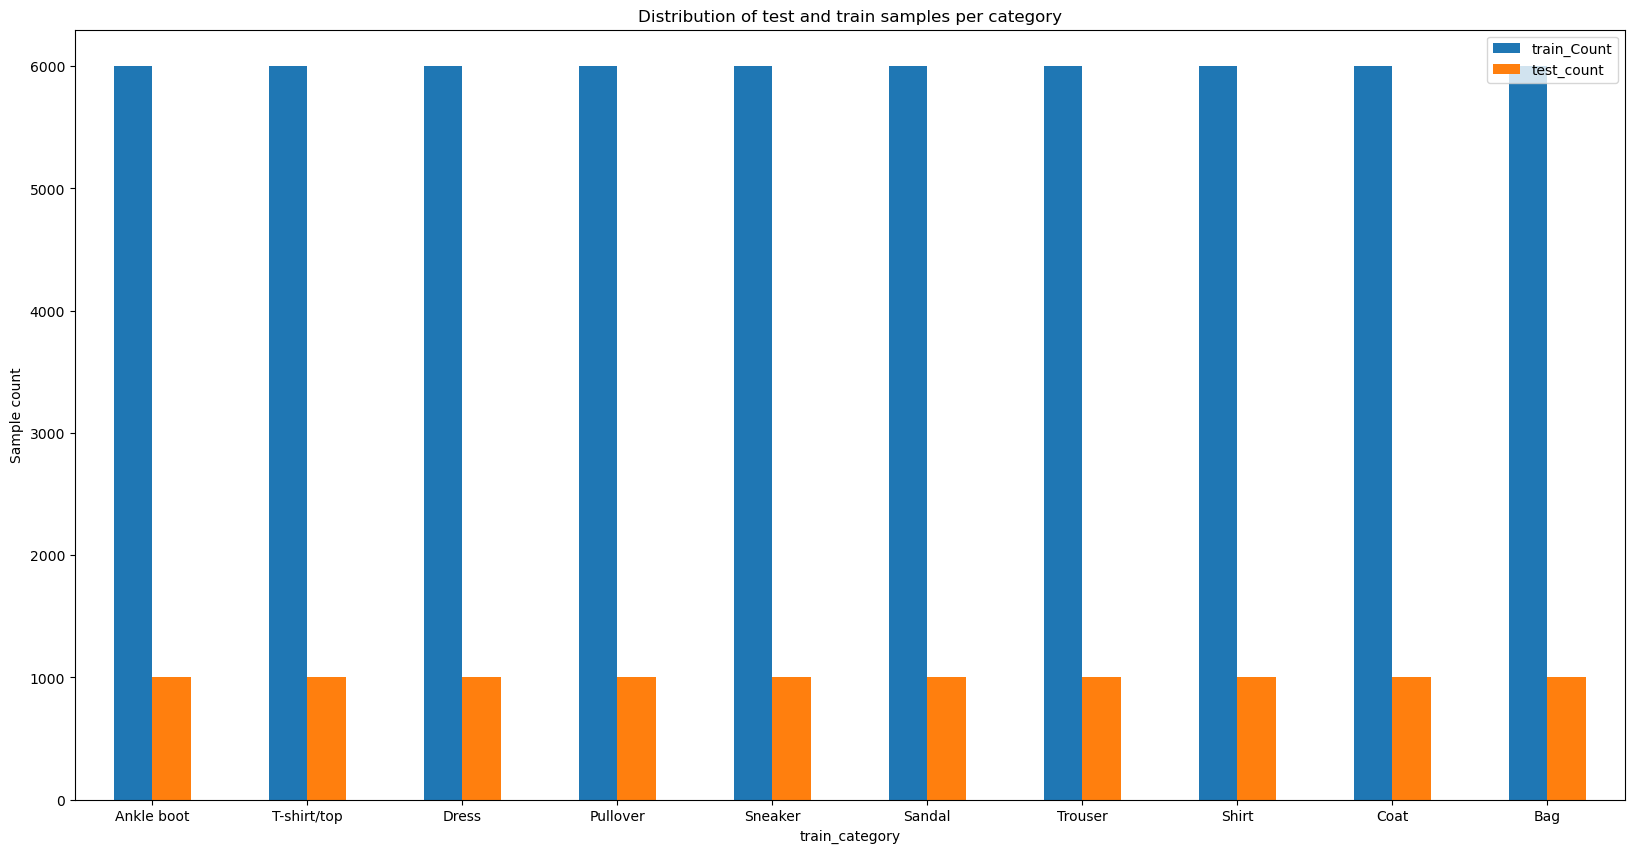

In [5]:
# Create DataFrame from the counts summary to plot the distribution
train_data = {
    'train_category': train_cat,
    'train_Count': train_sample_count,
    'test_count': test_sample_count
}
train_df = pd.DataFrame(train_data)
plt = train_df.plot(x='train_category',
        kind='bar',
        stacked=False,
        title='Distribution of test and train samples per category',
        figsize=(20, 10),
        ylabel='Sample count')
plt.set_xticklabels(train_df["train_category"],rotation=0)

# 3. Data Preparation -- Score: 1 Mark

Perform the data prepracessing that is required for the data that you have downloaded. 


This stage depends on the dataset that is used. 

## 3.1 Apply pre-processing techiniques

* to remove duplicate data
* to impute or remove missing data
* to remove data inconsistencies
* Encode categorical data
* Normalize the data
* Feature Engineering
* Stop word removal, lemmatiation, stemming, vectorization


IF ANY

#### Shape of one train data

In [6]:
trainX[0].shape

(28, 28)

#### The different image samples

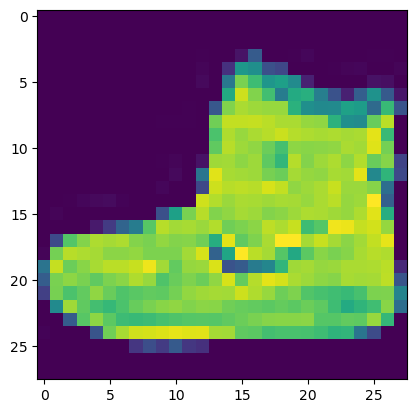

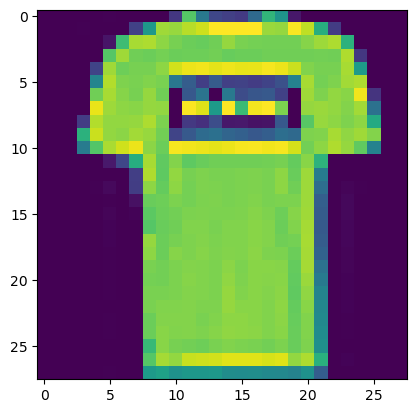

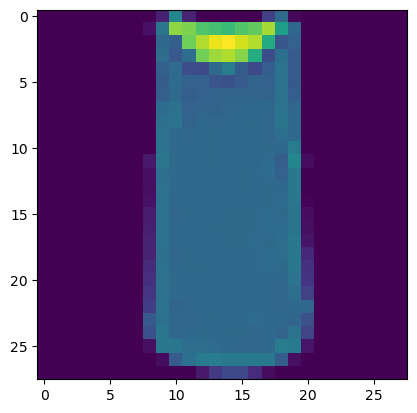

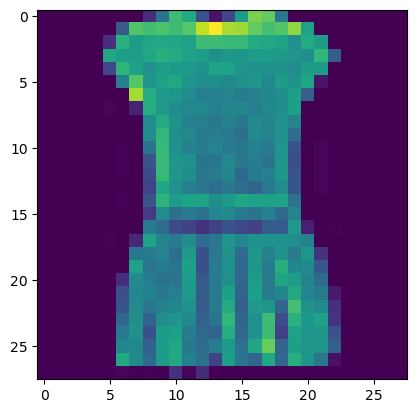

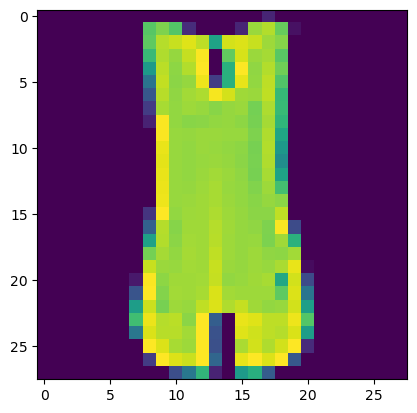

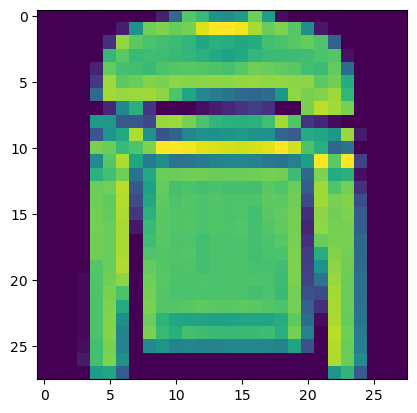

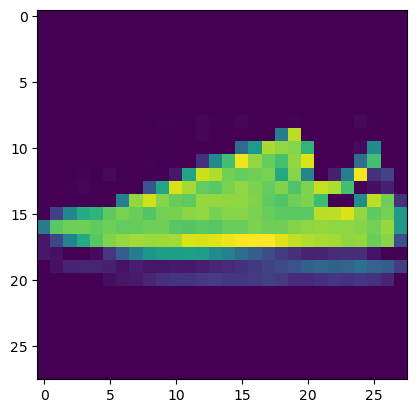

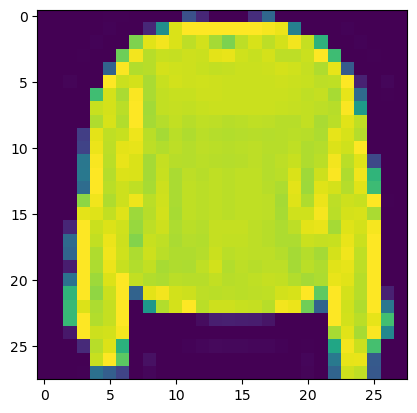

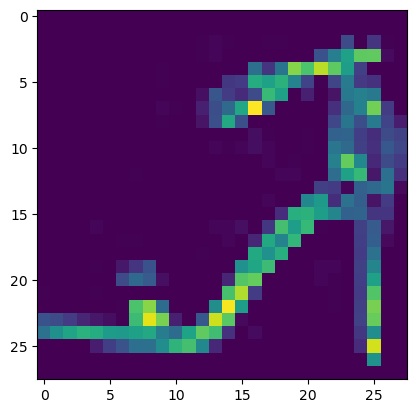

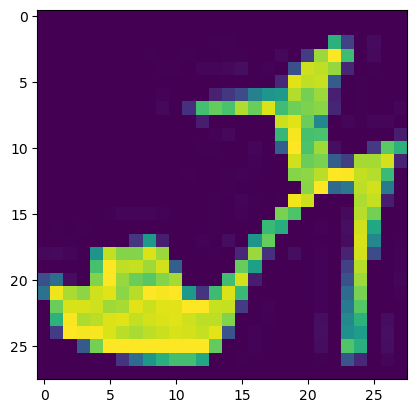

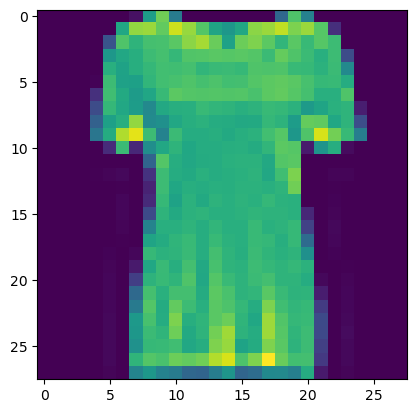

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

for i in range(11):
    plt.imshow(trainX[i])
    plt.show()

#### Normalizing the data

#### Data before normalization

In [8]:
trainX[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [9]:
##---------Type the code below this line------------------## 
trainX = trainX/ 255.0
testX = testX/ 255.0

#### Data after normalization 

In [10]:
trainX[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

**As the data is given in the form of images, each image is made up of 28 x 28 pixels and each pixel is between 0 to 255.  
We are normalizing the image pixels in between 0 to 1.**

## 3.2 Identify the target variables.

* Separate the data front the target such that the dataset is in the form of (X,y) or (Features, Label)

* Discretize / Encode the target variable or perform one-hot encoding on the target or any other as and if required.





**The data is taken from tensorflow which is already divided into training and test sets and the target variable is separated from the other independant variable.The target vaiable is label encoded as follows:**


| Label | Class |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
|4| Coat |
|5| Sandal |
|6| 	Shirt |
|7| Sneaker |
|8| Bag |
|9| Ankle boot |

In [11]:
# print the unique categorical label encodings in the dataset
np.unique(trainY)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

### Converting the label encoded target variable to one hot encoding

In [12]:
trainY = tf.keras.utils.to_categorical(trainY)
testY = tf.keras.utils.to_categorical(testY)

In [13]:
##---------Type the code below this line------------------##
print("TrainX shape ", trainX.shape)
print("TrainY shape ", trainY.shape)

print("TestX shape ", testX.shape)
print("TestY shape ", testY.shape)

TrainX shape  (60000, 28, 28)
TrainY shape  (60000, 10)
TestX shape  (10000, 28, 28)
TestY shape  (10000, 10)


In [15]:
print(trainY[0:5])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


## 3.3 Split the data into training set and testing set

**As we are taking the dataset from tensorflow the dataset is already split into train and test , we have 60000 train images and 10000 test images**

In [16]:
##---------Type the code below this line------------------##
print("TrainX shape ", trainX.shape)
print("TrainY shape ", trainY.shape)

print("TestX shape ", testX.shape)
print("TestY shape ", testY.shape)

TrainX shape  (60000, 28, 28)
TrainY shape  (60000, 10)
TestX shape  (10000, 28, 28)
TestY shape  (10000, 10)


## 3.4 Preprocessing report

Mention the method adopted  and justify why the method was used
* to remove duplicate data, if present 
* to impute or remove missing data, if present 
* to remove data inconsistencies, if present 
* to encode categorical data 
* the normalization technique used

If the any of the above are not present, then also add in the report below.

Report the size of the training dataset and testing dataset


##---------Type the answer below this line------------------##

- **There are no duplicates in the dataset, therefore no removal is required**
- **No missing data as all the data are pixel values**
- **Entire data is an array of image pixels, hence the only type of data is numeric, therefore no inconsistencies**
- **Target variable was label encoded category, the labels have been one-hot encoded**
- **The size of the training set is 60000 images and test set is 10000 images.Each image is of shape 28 x 28. They are normalised by dividing each pixel by a value of 255 since it represents highest intensity**

# 4. Deep Neural Network Architecture - Score:  Marks


## 4.1 Design the architecture that you will be using

* Sequential Model Building with Activation for each layer.
* Add dense layers, specifying the number of units in each layer and the activation function used in the layer.
* Use Relu Activation function in each hidden layer
* Use Sigmoid / softmax Activation function in the output layer as required

DO NOT USE CNN OR RNN. 

In [17]:
##---------Type the code below this line------------------##
model = tf.keras.Sequential()
# Input layer
model.add(Flatten(input_shape = (28,28)))
# First hidden layer
model.add(Dense(397, activation = "relu"))
# Second Hidden Layer
model.add(Dense(199, activation = "relu"))
# Third Hidden Layer
model.add(Dense(100, activation = "relu"))
# Output Layer
model.add(Dense(10,  activation = 'softmax'))

## 4.2 DNN Report

Report the following and provide justification for the same.



* Number of layers
* Number of units in each layer
* Total number of trainable parameters 



In [18]:
##---------Type the answer below this line------------------##
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 397)               311645    
                                                                 
 dense_1 (Dense)             (None, 199)               79202     
                                                                 
 dense_2 (Dense)             (None, 100)               20000     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 411,857
Trainable params: 411,857
Non-trainable params: 0
_________________________________________________________________


<b>We are flattening the image which of the size 28X28 into 784, hence there will be 784 units in the input layer.
For determing the number of hidden layer and units in each layer there is no standard method to define. So in this case, the first hidden layer, we are taking the mean of the units in input layer and output layer which is approximately 397 and for each hidden layer the number of units is reduced by approximately half. We have kept this till the units in the hidden layer reaches double digit.
<br>
The trainable parameters are calculated as the summation of multiplication of number of neurons in each layer with number of neurons in one further layer and then addition of number of neurons in hidden layer(except the input layer) and output layer:
<br>
$(784 * 397) + (397 * 199) + (199 * 100)  + (100 * 10) + 397 + 199 + 100 + 10$</b>

# 5. Training the model - Score: 1 Mark


## 5.1 Configure the training

Configure  the model for training, by using appropriate optimizers and regularizations

Compile with categorical CE loss and metric accuracy.

In [19]:
##---------Type the code below this line------------------##
# Initializing the SGD optimizer
sgd = SGD(learning_rate=0.1)
model.compile(optimizer = sgd , loss = 'categorical_crossentropy',metrics = ["accuracy"])

Learning rate for the SGD has been set as 0.1 and the loss function has been set as categorical crossentropy and metrics for evaluating the performance is accuracy

## 5.2 Train the model

Train Model with cross validation, with total time taken shown for 20 epochs.

Use SGD.

In [20]:
##---------Type the code below this line------------------##
history = model.fit(trainX, trainY , epochs=20, batch_size=64, validation_split = 0.20,verbose = 1)

Epoch 1/20
750/750 [==============================] - 13s 13ms/step - loss: 0.6014 - accuracy: 0.7837 - val_loss: 0.4361 - val_accuracy: 0.8426
Epoch 2/20
750/750 [==============================] - 10s 13ms/step - loss: 0.4084 - accuracy: 0.8508 - val_loss: 0.4049 - val_accuracy: 0.8485
Epoch 3/20
750/750 [==============================] - 11s 14ms/step - loss: 0.3637 - accuracy: 0.8661 - val_loss: 0.4216 - val_accuracy: 0.8533
Epoch 4/20
750/750 [==============================] - 11s 14ms/step - loss: 0.3346 - accuracy: 0.8760 - val_loss: 0.3394 - val_accuracy: 0.8788
Epoch 5/20
750/750 [==============================] - 11s 14ms/step - loss: 0.3124 - accuracy: 0.8845 - val_loss: 0.3557 - val_accuracy: 0.8710
Epoch 6/20
750/750 [==============================] - 11s 15ms/step - loss: 0.2964 - accuracy: 0.8883 - val_loss: 0.3323 - val_accuracy: 0.8805
Epoch 7/20
750/750 [==============================] - 11s 14ms/step - loss: 0.2807 - accuracy: 0.8959 - val_loss: 0.3371 - val_accuracy:

With each epoch, we can see that the loss and validation loss is decreasing. In the beginning the decrease is happening in large chunks but as we go down we are able to see that the loss values are getting reduced by very minor values. Accuracy and Validation_accuracy is increasing with each epoch. In the beginning the training accuracy is increasing rapidly but validation accuracy is increasing at constant rate. As the epochs increase, the improvement in training accuracy and validation accuracy is slowing down. In the last stages, the accuracy scores improvement is negligible

#### Total time : On average 10 sec per epoch so 11 * 20 = 220 sec for 20 epochs

<b> SGD has been declared in the step 5.1</b>

Justify your choice of optimizers and regulizations used and the hyperparameters tuned


##---------Type the answers below this line------------------##
<br>
- **For the number of number of hidden layer equal to 4, we were getting accuracy around 88%. The number of hidden layer equal to 3 is giving the best accuracy on the test data which is similar to the 4 hidden layers. We have taken more than 2 hidden layers as the more hidden layer the more prediction capability is present but at the same time it should not be greater than a certain threshold as it can lead to overfitting. The neural networks having upto 2 hidden layers are called shallow neural networks. The neural network designed for this purpose is not a shallow neural network**
<br>
- **The learning rate of 0.001 was giving the accuracy around 82%. The learning rate of 0.01 is giving the accuracy of around 87% and the best accuracy on the test data is given by the learning rate of 0.1 on the test data.**
<br>
- **The best accuracy is observed using the batch size of 64 which is 88% on the test data. Other batch sizes which were tried are 32, 128, 256.**
<br>
- **When using the l1 regularizer with value of 0.0001 in the 3 hidden layer is giving accuracy of 86% on the test data. Without the l1 regularizer, it is giving accuracy of 88% on the test data.**
<br>
- **Based on the analysis we have done for the optimizers we came to know that SGD generalises better conmpared to Adam. RMSprop is better suited where we have RNN architecture.**

# 6. Test the model - 0.5 marks


In [21]:
##---------Type the code below this line------------------##
loss, accuracy = model.evaluate(testX, testY)
print('Test accuracy:',accuracy * 100,'%')

313/313 [==============================] - 3s 8ms/step - loss: 0.3368 - accuracy: 0.8880
Test accuracy: 88.80000114440918 %


# 7. Intermediate result  - Score: 1 mark

1. Plot the training and validation accuracy history.
2. Plot the training and validation loss history. 
3. Report the testing accuracy and loss.
4. Show Confusion Matrix for testing dataset.
5. Report values for preformance study metrics like accuracy, precision, recall, F1 Score.


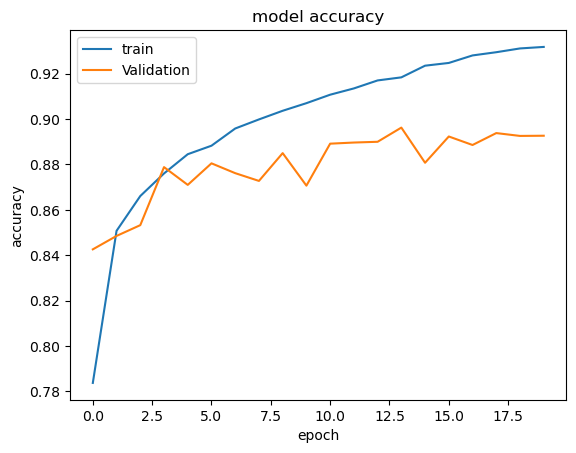

In [22]:
##---------Type the code below this line------------------##
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()

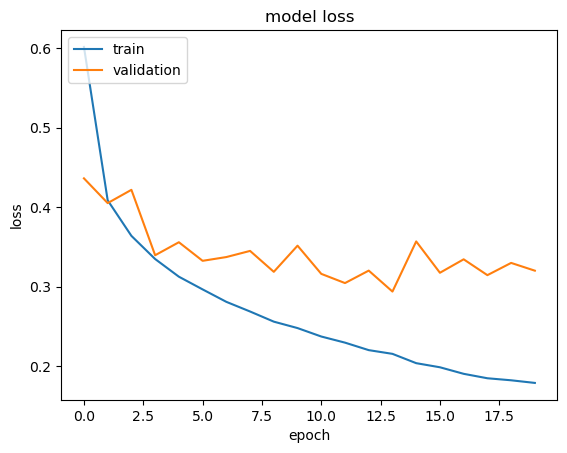

In [23]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [24]:
loss, accuracy = model.evaluate(testX, testY)
print('Test accuracy:' , accuracy * 100,'%')
print('Loss: ', loss)

313/313 [==============================] - 2s 8ms/step - loss: 0.3368 - accuracy: 0.8880
Test accuracy: 88.80000114440918 %
Loss:  0.3367891311645508


#### Based on the loss and accuracy curve the model is overfitting as we increase the number of epoch.

313/313 [==============================] - 1s 4ms/step


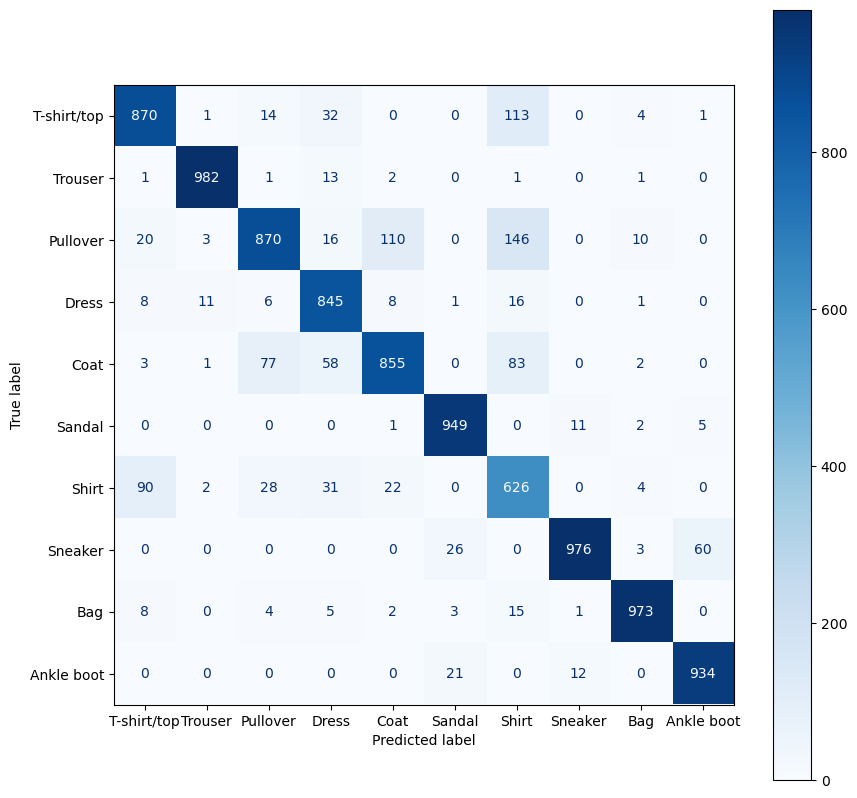

In [27]:
y_prob = model.predict(testX)
#Convert prediction probabilities into integers
y_pred = y_prob.argmax(axis=1)
trueY = np.argmax(testY, axis = 1)
#Confusion matrix
disp=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_pred,trueY),display_labels=class_names, )
fig, ax = plt.subplots(figsize=(10,10))
disp = disp.plot(ax=ax, cmap=plt.cm.Blues,values_format='g')

Diagonal elements display the correct labels that have been predicted correctly. Trouser,Sneaker and bag are the classes with best predictions and shirt is the class with the worst predictions from among all the class labels. We can see that the model incorrectly identifies many items as coat and shirt.

In [28]:
from sklearn.metrics import classification_report
print(classification_report(trueY, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.841     0.870     0.855      1000
           1      0.981     0.982     0.982      1000
           2      0.740     0.870     0.800      1000
           3      0.943     0.845     0.891      1000
           4      0.792     0.855     0.823      1000
           5      0.980     0.949     0.964      1000
           6      0.780     0.626     0.694      1000
           7      0.916     0.976     0.945      1000
           8      0.962     0.973     0.968      1000
           9      0.966     0.934     0.950      1000

    accuracy                          0.888     10000
   macro avg      0.890     0.888     0.887     10000
weighted avg      0.890     0.888     0.887     10000



### Observations
##### Precision

The best precision is coming out for Trouser (class label 1) and the worst precision is coming out for Shirt (class label 6). The lower precision score for the shirt indicates that many items are getting identified as shirts but their true label is different. Trouser is having the best precision meaning that it is getting correctly identified. Same can also be said for class labels 3, 5, 7, 8 and 9 which are having precision of more than 0.9 or 90%. The corresponding labels for class labels 3, 5, 7, 8 and 9 are dress, Sandal, Sneaker, Bag and Ankle boot.
#### Recall
The best recall is coming out for Trouser (class label 1) and the worst is  coming out for Shirt (class label 6). The lower recall score for shirt indicates that model is having problem in identifying the shirts as shirts and is categorizing it into other categories. Model is far better in identifying Trousers as Trousers. Same can be seen that it is identifying class labels 5, 7, 8 and 9 better as the score is more than 0.9 or 90%. The corresponding labels for class labels 5, 7, 8 and 9 are Sandal, Sneaker, Bag and Ankle boot.

#### F1 score

The best f1 score is coming out for Trouser (class label 1) and the worst is coming out for Shirt (class label 6). The model is predicting correctly the following class labels 5,7, 8 and 9. The score is more than 0.9 or 90%. e corresponding labels for class labels 5, 7, 8 and 9 are Sandal, Sneaker, Bag and Ankle boot.

#### Overall Accuracy

Model is giving overall accuracy of 0.888 or 88%. 

# 8. Model architecture - Score: 1 mark


Modify the architecture designed in section 4.1 

1. by decreasing one layer
2. by increasing one layer

For example, if the architecture in 4.1 has 5 layers, then 8.1 should have 4 layers and 8.2 should have 6 layers.

Plot the comparison of the training and validation accuracy of the three architecures (4.1, 8.1 and 8.2)



#### 8.1 Model with decreased layer

In [29]:
##---------Type the code below this line------------------##
model1 = tf.keras.Sequential()
# Input Layer
model1.add(Flatten(input_shape = (28,28)))
# First Hidden layer
model1.add(Dense(397, activation = "relu"))
#Second Hidden Layer
model1.add(Dense(199, activation = "relu"))
# Output Layer
model1.add(Dense(10,  activation = 'softmax'))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 397)               311645    
                                                                 
 dense_5 (Dense)             (None, 199)               79202     
                                                                 
 dense_6 (Dense)             (None, 10)                2000      
                                                                 
Total params: 392,847
Trainable params: 392,847
Non-trainable params: 0
_________________________________________________________________


In [30]:
model1.compile(optimizer = sgd , loss = 'categorical_crossentropy',metrics = ["accuracy"])

In [31]:
history1 = model1.fit(trainX, trainY , epochs=20, batch_size=64, validation_split = 0.20,verbose = 1)

Epoch 1/20
750/750 [==============================] - 4s 5ms/step - loss: 0.5905 - accuracy: 0.7915 - val_loss: 0.4284 - val_accuracy: 0.8461
Epoch 2/20
750/750 [==============================] - 4s 5ms/step - loss: 0.4128 - accuracy: 0.8499 - val_loss: 0.3865 - val_accuracy: 0.8593
Epoch 3/20
750/750 [==============================] - 9s 11ms/step - loss: 0.3669 - accuracy: 0.8651 - val_loss: 0.3725 - val_accuracy: 0.8667
Epoch 4/20
750/750 [==============================] - 9s 12ms/step - loss: 0.3416 - accuracy: 0.8742 - val_loss: 0.3502 - val_accuracy: 0.8745
Epoch 5/20
750/750 [==============================] - 9s 12ms/step - loss: 0.3191 - accuracy: 0.8828 - val_loss: 0.3334 - val_accuracy: 0.8796
Epoch 6/20
750/750 [==============================] - 9s 12ms/step - loss: 0.3016 - accuracy: 0.8884 - val_loss: 0.3584 - val_accuracy: 0.8674
Epoch 7/20
750/750 [==============================] - 9s 12ms/step - loss: 0.2884 - accuracy: 0.8931 - val_loss: 0.3175 - val_accuracy: 0.8844
E

#### 8.2 Model with increased layer

In [32]:
model2 = tf.keras.Sequential()
# Input layer
model2.add(Flatten(input_shape = (28,28)))
# First hidden layer
model2.add(Dense(397, activation = "relu"))
# Second Hidden layer
model2.add(Dense(199, activation = "relu"))
# Third Hidden layer
model2.add(Dense(100, activation = "relu"))
# Fourth Hidden layer
model2.add(Dense(50, activation = "relu"))
# Output layer
model2.add(Dense(10,  activation = 'softmax'))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 397)               311645    
                                                                 
 dense_8 (Dense)             (None, 199)               79202     
                                                                 
 dense_9 (Dense)             (None, 100)               20000     
                                                                 
 dense_10 (Dense)            (None, 50)                5050      
                                                                 
 dense_11 (Dense)            (None, 10)                510       
                                                                 
Total params: 416,407
Trainable params: 416,407
Non-tr

In [33]:
model2.compile(optimizer = sgd , loss = 'categorical_crossentropy',metrics = ["accuracy"])

In [34]:
history2 = model2.fit(trainX, trainY , epochs=20, batch_size=64, validation_split = 0.20,verbose = 1)

Epoch 1/20
750/750 [==============================] - 5s 6ms/step - loss: 0.6264 - accuracy: 0.7715 - val_loss: 0.4565 - val_accuracy: 0.8300
Epoch 2/20
750/750 [==============================] - 7s 10ms/step - loss: 0.4148 - accuracy: 0.8466 - val_loss: 0.4394 - val_accuracy: 0.8449
Epoch 3/20
750/750 [==============================] - 11s 15ms/step - loss: 0.3713 - accuracy: 0.8625 - val_loss: 0.3608 - val_accuracy: 0.8655
Epoch 4/20
750/750 [==============================] - 10s 13ms/step - loss: 0.3399 - accuracy: 0.8734 - val_loss: 0.3731 - val_accuracy: 0.8588
Epoch 5/20
750/750 [==============================] - 9s 12ms/step - loss: 0.3154 - accuracy: 0.8802 - val_loss: 0.3482 - val_accuracy: 0.8730
Epoch 6/20
750/750 [==============================] - 9s 12ms/step - loss: 0.2992 - accuracy: 0.8880 - val_loss: 0.3536 - val_accuracy: 0.8706
Epoch 7/20
750/750 [==============================] - 9s 12ms/step - loss: 0.2836 - accuracy: 0.8930 - val_loss: 0.3225 - val_accuracy: 0.886

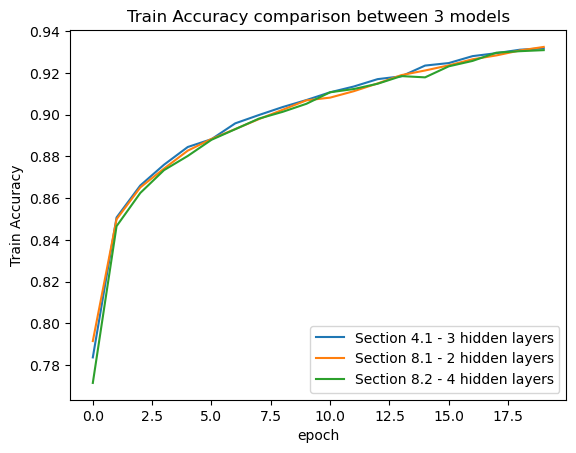

In [35]:
# Plot comparing the train accuracy between the 3 models
plt.plot(history.history['accuracy'])
plt.plot(history1.history['accuracy'])
plt.plot(history2.history['accuracy'])

plt.title('Train Accuracy comparison between 3 models')
plt.ylabel('Train Accuracy')
plt.xlabel('epoch')
plt.legend(['Section 4.1 - 3 hidden layers', 'Section 8.1 - 2 hidden layers', 'Section 8.2 - 4 hidden layers'], loc='lower right')
plt.show()

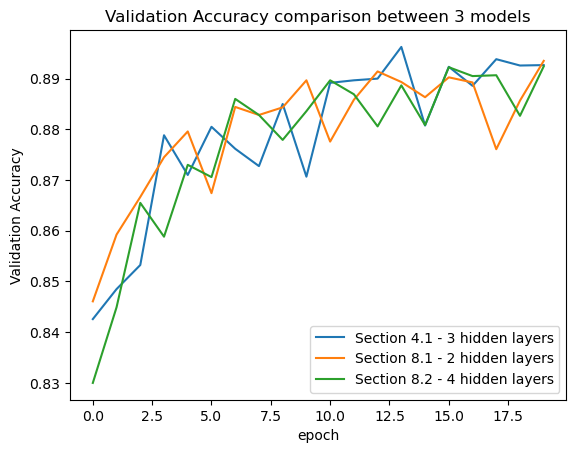

In [38]:
# Plot comparing the test accuracy between the 3 models
plt.plot(history.history['val_accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.plot(history2.history['val_accuracy'])

plt.title('Validation Accuracy comparison between 3 models')
plt.ylabel('Validation Accuracy')
plt.xlabel('epoch')
plt.legend(['Section 4.1 - 3 hidden layers', 'Section 8.1 - 2 hidden layers', 'Section 8.2 - 4 hidden layers'], loc='lower right')
plt.show()

Based on the plots on the accuracy the training and validation accuracy is coming out to be almost same for the base model and the models with decreased and increased layers.

# 9. Regularisations - Score: 1 mark

Modify the architecture designed in section 4.1

1. Dropout of ratio 0.25
2. Dropout of ratio 0.25 with L2 regulariser with factor 1e−04. 

Plot the comparison of the training and validation accuracy of the three (4.1, 9.1 and 9.2)



#### Model with dropout layer

In [39]:
##---------Type the code below this line------------------##
model3 = tf.keras.Sequential()  
# Input Layer
model3.add(Flatten(input_shape = (28,28)))
# First hidden layer
model3.add(Dense(397, activation = "relu"))
# Adding droupout to first hidden layer
model3.add(Dropout(0.25))
# Second Hidden layer
model3.add(Dense(199, activation = "relu"))
# Adding droupout to second hidden layer
model3.add(Dropout(0.25))
# Third hidden layer
model3.add(Dense(100, activation = "relu"))
# Adding droupout to third hidden layer
model3.add(Dropout(0.25))
# Output layer
model3.add(Dense(10,  activation = 'softmax'))
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 397)               311645    
                                                                 
 dropout (Dropout)           (None, 397)               0         
                                                                 
 dense_13 (Dense)            (None, 199)               79202     
                                                                 
 dropout_1 (Dropout)         (None, 199)               0         
                                                                 
 dense_14 (Dense)            (None, 100)               20000     
                                                                 
 dropout_2 (Dropout)         (None, 100)              

In [40]:
model3.compile(optimizer = sgd , loss = 'categorical_crossentropy',metrics = ["accuracy"])

In [41]:
history3 = model3.fit(trainX, trainY , epochs=20, batch_size=64, validation_split = 0.20,verbose = 1)

Epoch 1/20
750/750 [==============================] - 5s 6ms/step - loss: 0.7105 - accuracy: 0.7422 - val_loss: 0.4582 - val_accuracy: 0.8300
Epoch 2/20
750/750 [==============================] - 11s 14ms/step - loss: 0.4883 - accuracy: 0.8238 - val_loss: 0.4748 - val_accuracy: 0.8270
Epoch 3/20
750/750 [==============================] - 13s 18ms/step - loss: 0.4383 - accuracy: 0.8418 - val_loss: 0.3987 - val_accuracy: 0.8528
Epoch 4/20
750/750 [==============================] - 14s 18ms/step - loss: 0.4064 - accuracy: 0.8528 - val_loss: 0.3808 - val_accuracy: 0.8634
Epoch 5/20
750/750 [==============================] - 14s 18ms/step - loss: 0.3870 - accuracy: 0.8592 - val_loss: 0.3586 - val_accuracy: 0.8703
Epoch 6/20
750/750 [==============================] - 14s 18ms/step - loss: 0.3675 - accuracy: 0.8659 - val_loss: 0.3466 - val_accuracy: 0.8717
Epoch 7/20
750/750 [==============================] - 14s 18ms/step - loss: 0.3584 - accuracy: 0.8711 - val_loss: 0.3458 - val_accuracy: 0

#### Model with dropout layer and L2 regularisation

In [42]:
model4 = tf.keras.Sequential()
# Input layer
model4.add(Flatten(input_shape = (28,28)))
# First hidden layer with L2 regularizer
model4.add(Dense(397, activation = "relu", kernel_regularizer=regularizers.l2(0.0001)))
# adding droupout to first hidden layer
model4.add(Dropout(0.25))
# Second hidden layer with L2 regularizer
model4.add(Dense(199, activation = "relu", kernel_regularizer=regularizers.l2(0.0001)))
# adding droupout to second hidden layer
model4.add(Dropout(0.25))
# Third hidden layer with L2 regularizer
model4.add(Dense(100, activation = "relu", kernel_regularizer=regularizers.l2(0.0001)))
# adding droupout to third hidden layer
model4.add(Dropout(0.25))
# output layer
model4.add(Dense(10,  activation = 'softmax'))
model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 397)               311645    
                                                                 
 dropout_3 (Dropout)         (None, 397)               0         
                                                                 
 dense_17 (Dense)            (None, 199)               79202     
                                                                 
 dropout_4 (Dropout)         (None, 199)               0         
                                                                 
 dense_18 (Dense)            (None, 100)               20000     
                                                                 
 dropout_5 (Dropout)         (None, 100)              

In [43]:
model4.compile(optimizer = sgd , loss = 'categorical_crossentropy',metrics = ["accuracy"])

In [44]:
history4 = model4.fit(trainX, trainY , epochs=20, batch_size=64, validation_split = 0.20,verbose = 1)

Epoch 1/20
750/750 [==============================] - 6s 7ms/step - loss: 0.7995 - accuracy: 0.7461 - val_loss: 0.5917 - val_accuracy: 0.8097
Epoch 2/20
750/750 [==============================] - 6s 8ms/step - loss: 0.5766 - accuracy: 0.8281 - val_loss: 0.5534 - val_accuracy: 0.8342
Epoch 3/20
750/750 [==============================] - 13s 18ms/step - loss: 0.5323 - accuracy: 0.8430 - val_loss: 0.5079 - val_accuracy: 0.8461
Epoch 4/20
750/750 [==============================] - 16s 21ms/step - loss: 0.5019 - accuracy: 0.8524 - val_loss: 0.4552 - val_accuracy: 0.8687
Epoch 5/20
750/750 [==============================] - 15s 20ms/step - loss: 0.4795 - accuracy: 0.8607 - val_loss: 0.4543 - val_accuracy: 0.8649
Epoch 6/20
750/750 [==============================] - 16s 21ms/step - loss: 0.4638 - accuracy: 0.8644 - val_loss: 0.4475 - val_accuracy: 0.8683
Epoch 7/20
750/750 [==============================] - 16s 21ms/step - loss: 0.4484 - accuracy: 0.8691 - val_loss: 0.4221 - val_accuracy: 0.8

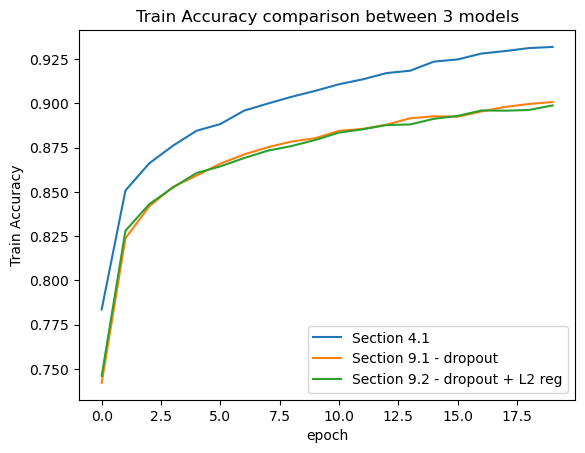

In [45]:
# Plot comparing the train accuracy between the 3 models
plt.plot(history.history['accuracy'])
plt.plot(history3.history['accuracy'])
plt.plot(history4.history['accuracy'])

plt.title('Train Accuracy comparison between 3 models')
plt.ylabel('Train Accuracy')
plt.xlabel('epoch')
plt.legend(['Section 4.1', 'Section 9.1 - dropout', 'Section 9.2 - dropout + L2 reg'], loc='lower right')
plt.show()

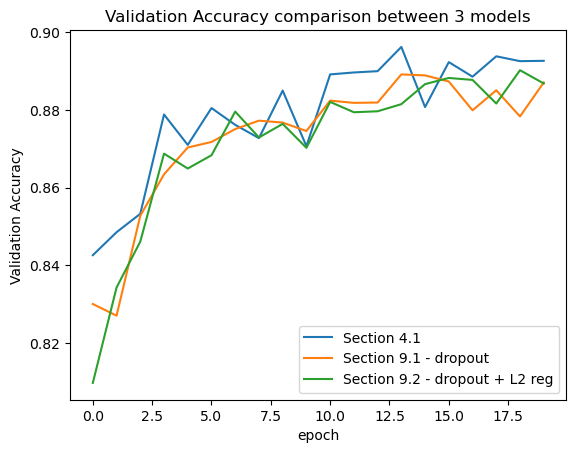

In [47]:
# Plot comparing the test accuracy between the 3 models
plt.plot(history.history['val_accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.plot(history4.history['val_accuracy'])

plt.title('Validation Accuracy comparison between 3 models')
plt.ylabel('Validation Accuracy')
plt.xlabel('epoch')
plt.legend(['Section 4.1', 'Section 9.1 - dropout', 'Section 9.2 - dropout + L2 reg'], loc='lower right')
plt.show()

Overfitting is not observed for the models with dropout and dropout plus regularization compared to the base model but the training accuracy is coming out to be similar for both but the validation accuracy is greater in model with dropout compared to model with dropout and L2 regularization at the end of all the epochs. Training accuracy is best in the base model compared to the other two models

# 10. Optimisers -Score: 1 mark

Modify the code written in section 5.2

1. RMSProp with your choice of hyper parameters
2. Adam with your choice of hyper parameters

Plot the comparison of the training and validation accuracy of the three (5.2, 10.1 and 10.2)


#### Model trained with RMSprop optimizer

In [48]:
##---------Type the code below this line------------------##
# Initializing RMSprop optimizer
rmsprop = RMSprop(learning_rate = 0.1)

model5 = tf.keras.Sequential()   
# Input layer
model5.add(Flatten(input_shape = (28,28)))
# First hidden layer
model5.add(Dense(397, activation = "relu"))
# Second hidden layer
model5.add(Dense(199, activation = "relu"))
# Third hidden layer
model5.add(Dense(100, activation = "relu"))
# output layer
model5.add(Dense(10,  activation = 'softmax'))
model5.summary()

model5.compile(optimizer = rmsprop, loss = 'categorical_crossentropy',metrics = ["accuracy"])
history5 = model5.fit(trainX, trainY , epochs=20, batch_size=64, validation_split = 0.20,verbose = 1)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 397)               311645    
                                                                 
 dense_21 (Dense)            (None, 199)               79202     
                                                                 
 dense_22 (Dense)            (None, 100)               20000     
                                                                 
 dense_23 (Dense)            (None, 10)                1010      
                                                                 
Total params: 411,857
Trainable params: 411,857
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
750/750 [============================

With each epoch, we can see that the loss and validation loss is decreasing. In the beginning the decrease happened in very large quantity from 210 in epoch 1 to 2.3 in epoch 2 but as we go down we are able to see that the loss values are fluctuating. Accuracy and Validation_accuracyare also fluctuating. This signifies that the model is not able to find the optimal point at which the loss values is minimum or less and accuracy is high

#### Model trained with Adam optimizer

In [49]:
# Initializing the Adam optimizer
adam = Adam(learning_rate = 0.1)

model6 = tf.keras.Sequential()
# Input layer
model6.add(Flatten(input_shape = (28,28)))
# First hidden layer
model6.add(Dense(397, activation = "relu"))
# Second hidden layer
model6.add(Dense(199, activation = "relu"))
# Third hidden layer
model6.add(Dense(100, activation = "relu"))
# Output layer
model6.add(Dense(10,  activation = 'softmax'))
model6.summary()

model6.compile(optimizer = adam, loss = 'categorical_crossentropy',metrics = ["accuracy"])
history6 = model6.fit(trainX, trainY , epochs=20, batch_size=64, validation_split = 0.20,verbose = 1)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_24 (Dense)            (None, 397)               311645    
                                                                 
 dense_25 (Dense)            (None, 199)               79202     
                                                                 
 dense_26 (Dense)            (None, 100)               20000     
                                                                 
 dense_27 (Dense)            (None, 10)                1010      
                                                                 
Total params: 411,857
Trainable params: 411,857
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
750/750 [============================

With each epoch, we can see that the loss and validation loss is decreasing. In the beginning the decrease happened in very large quantity from 4.1 in epoch 1 to 1.8 in epoch 2 but as we go down we are able to see that the loss values are increasing meaning the model is able to find the optimal point. Accuracy and Validation_accuracy are having little fluctuations and hence signifies that it is not able to find the optimal value at which the loss is minumum and accuracy is the highest

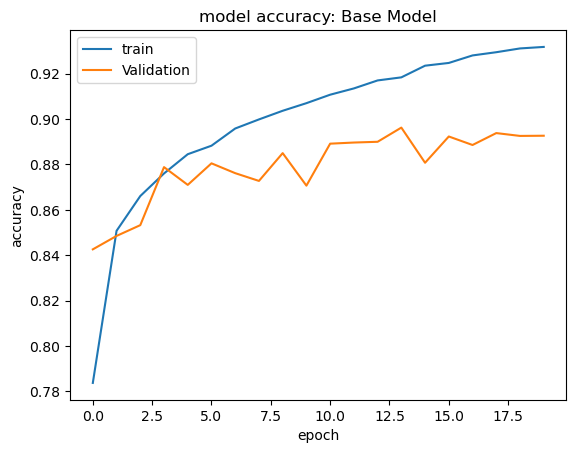

In [50]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy: Base Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()

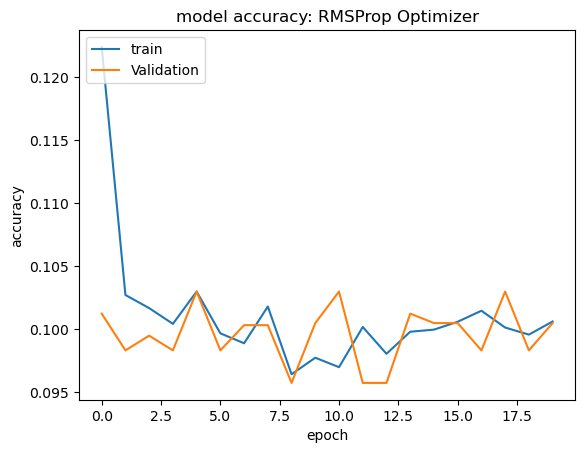

In [51]:
plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('model accuracy: RMSProp Optimizer')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()

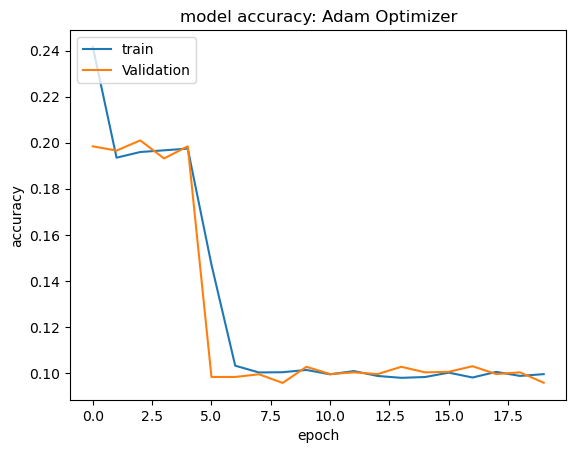

In [52]:
plt.plot(history6.history['accuracy'])
plt.plot(history6.history['val_accuracy'])
plt.title('model accuracy: Adam Optimizer')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()

In the beginning epochs the accuracy is coming down and as the epochs increase, this stablizes for both the model trained with RMSprop or adam optimizer. The accuracy scores are also very low compared to the model trained with SGD optimizer

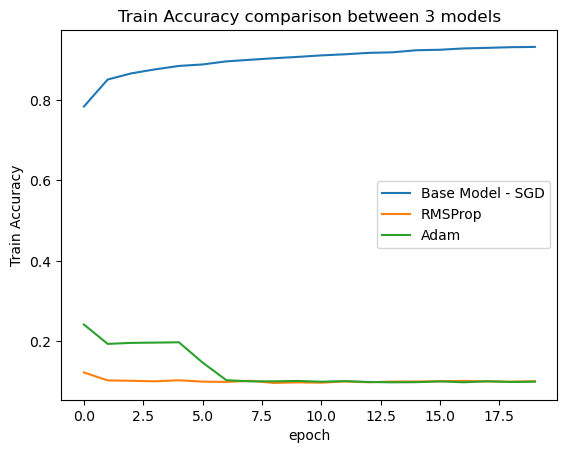

In [53]:
# Plot comparing the train accuracy between the 3 models
plt.plot(history.history['accuracy'])
plt.plot(history5.history['accuracy'])
plt.plot(history6.history['accuracy'])

plt.title('Train Accuracy comparison between 3 models')
plt.ylabel('Train Accuracy')
plt.xlabel('epoch')
plt.legend(['Base Model - SGD', 'RMSProp', 'Adam'], loc='center right')
plt.show()

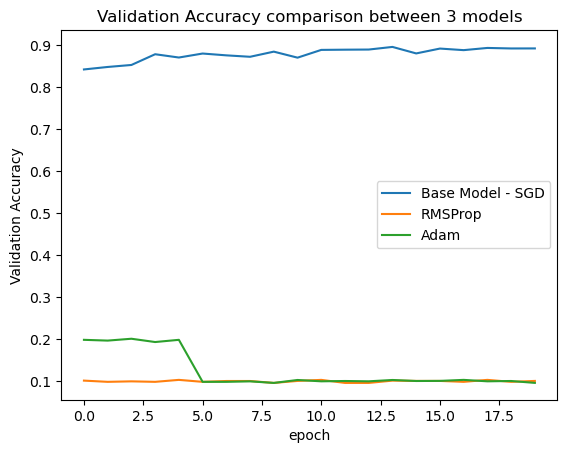

In [54]:
# Plot comparing the test accuracy between the 3 models
plt.plot(history.history['val_accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.plot(history6.history['val_accuracy'])

plt.title('Validation Accuracy comparison between 3 models')
plt.ylabel('Validation Accuracy')
plt.xlabel('epoch')
plt.legend(['Base Model - SGD', 'RMSProp', 'Adam'], loc='center right')
plt.show()

The training and validation accuracy for model trained using Adam and RMSprop is very low compared to our base model.

# 11. Conclusion - Score: 1 mark

Comparing the sections 4.1, 5.2, 8, 9, and 10, present your observations on which model or architecture or regualiser or optimiser perfomed better.


In [55]:
##---------Type the code below this line------------------##
loss, accuracy = model.evaluate(testX, testY)
print('Test accuracy of base model:' , accuracy * 100,'%')
print('Loss of base model: ', loss)
print('\n\n')

loss1, accuracy1 = model1.evaluate(testX, testY)
print('Test accuracy of decreased hidden layer:' , accuracy1 * 100,'%')
print('Loss of decreased hidden layer: ', loss1)
print('\n\n')

loss2, accuracy2 = model2.evaluate(testX, testY)
print('Test accuracy of increased hidden layer:' , accuracy2 * 100,'%')
print('Loss of increased hidden layer: ', loss2)
print('\n\n')

loss3, accuracy3 = model3.evaluate(testX, testY)
print('Test accuracy of model with droupout ratio of 0.25:' , accuracy3 * 100,'%')
print('Loss of model with droupout ratio of 0.25: ', loss3)
print('\n\n')

loss4, accuracy4 = model4.evaluate(testX, testY)
print('Test accuracy of model with droupout ratio of 0.25 and l2 reguarlizer:' , accuracy4 * 100,'%')
print('Loss of model with droupout ratio of 0.25 and l2 reguarlizer: ', loss4)
print('\n\n')

loss5, accuracy5 = model5.evaluate(testX, testY)
print('Test accuracy of model with RMSProp optimizer:' , accuracy5 * 100,'%')
print('Loss of model with RMSProp optimizer: ', loss5)
print('\n\n')

loss6, accuracy6 = model6.evaluate(testX, testY)
print('Test accuracy of model with Adam optimizer:' , accuracy6 * 100,'%')
print('Loss of model with Adam optimizer: ', loss6)
print('\n\n')

313/313 [==============================] - 3s 9ms/step - loss: 0.3368 - accuracy: 0.8880
Test accuracy of base model: 88.80000114440918 %
Loss of base model:  0.3367891311645508



313/313 [==============================] - 2s 8ms/step - loss: 0.3359 - accuracy: 0.8867
Test accuracy of decreased hidden layer: 88.66999745368958 %
Loss of decreased hidden layer:  0.33591407537460327



313/313 [==============================] - 3s 9ms/step - loss: 0.3501 - accuracy: 0.8883
Test accuracy of increased hidden layer: 88.83000016212463 %
Loss of increased hidden layer:  0.3501172959804535



313/313 [==============================] - 3s 9ms/step - loss: 0.3389 - accuracy: 0.8801
Test accuracy of model with droupout ratio of 0.25: 88.01000118255615 %
Loss of model with droupout ratio of 0.25:  0.33893150091171265



313/313 [==============================] - 4s 13ms/step - loss: 0.4211 - accuracy: 0.8778
Test accuracy of model with droupout ratio of 0.25 and l2 reguarlizer: 87.77999877929688 %

[Text(0, 0, 'Base Model'),
 Text(1, 0, '1 less hidden layer'),
 Text(2, 0, '1 more hidden layer'),
 Text(3, 0, 'dropout'),
 Text(4, 0, 'dropout + L2 reg'),
 Text(5, 0, 'RMSProp'),
 Text(6, 0, 'Adam')]

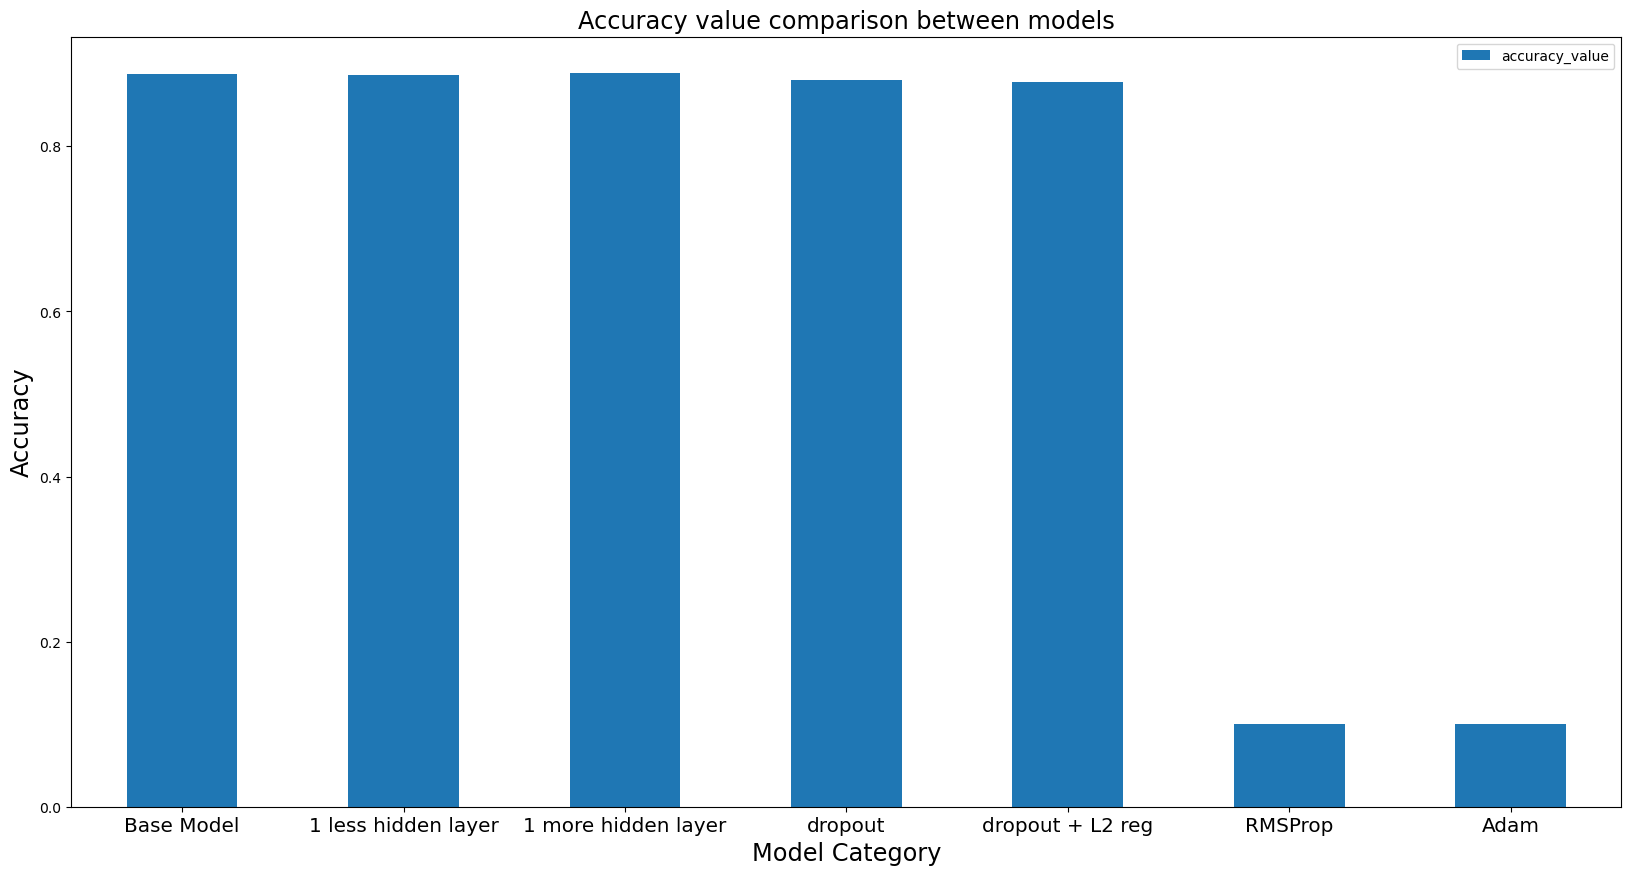

In [56]:
# bar plot to show accuracy comparison between different models
y = [accuracy, accuracy1, accuracy2, accuracy3, accuracy4, accuracy5, accuracy6]
x = ["Base Model", "1 less hidden layer", "1 more hidden layer", "dropout", "dropout + L2 reg", "RMSProp", "Adam"]
# Create DataFrame from the counts summary to plot the distribution
model_data = {
    'model_category': x,
    'accuracy_value': y
}
model_df = pd.DataFrame(model_data)
plt = model_df.plot(x='model_category',
        kind='bar',
        stacked=False,
        title='Accuracy value comparison between models',
        figsize=(20, 10))
plt.set_ylabel("Accuracy",fontsize="xx-large")
plt.set_xlabel("Model Category",fontsize="xx-large")
plt.set_title('Accuracy value comparison between models', fontsize="xx-large")
plt.set_xticklabels(model_df["model_category"],rotation=0, fontsize="x-large")

[Text(0, 0, 'Base Model'),
 Text(1, 0, '1 less hidden layer'),
 Text(2, 0, '1 more hidden layer'),
 Text(3, 0, 'dropout'),
 Text(4, 0, 'dropout + L2 reg'),
 Text(5, 0, 'RMSProp'),
 Text(6, 0, 'Adam')]

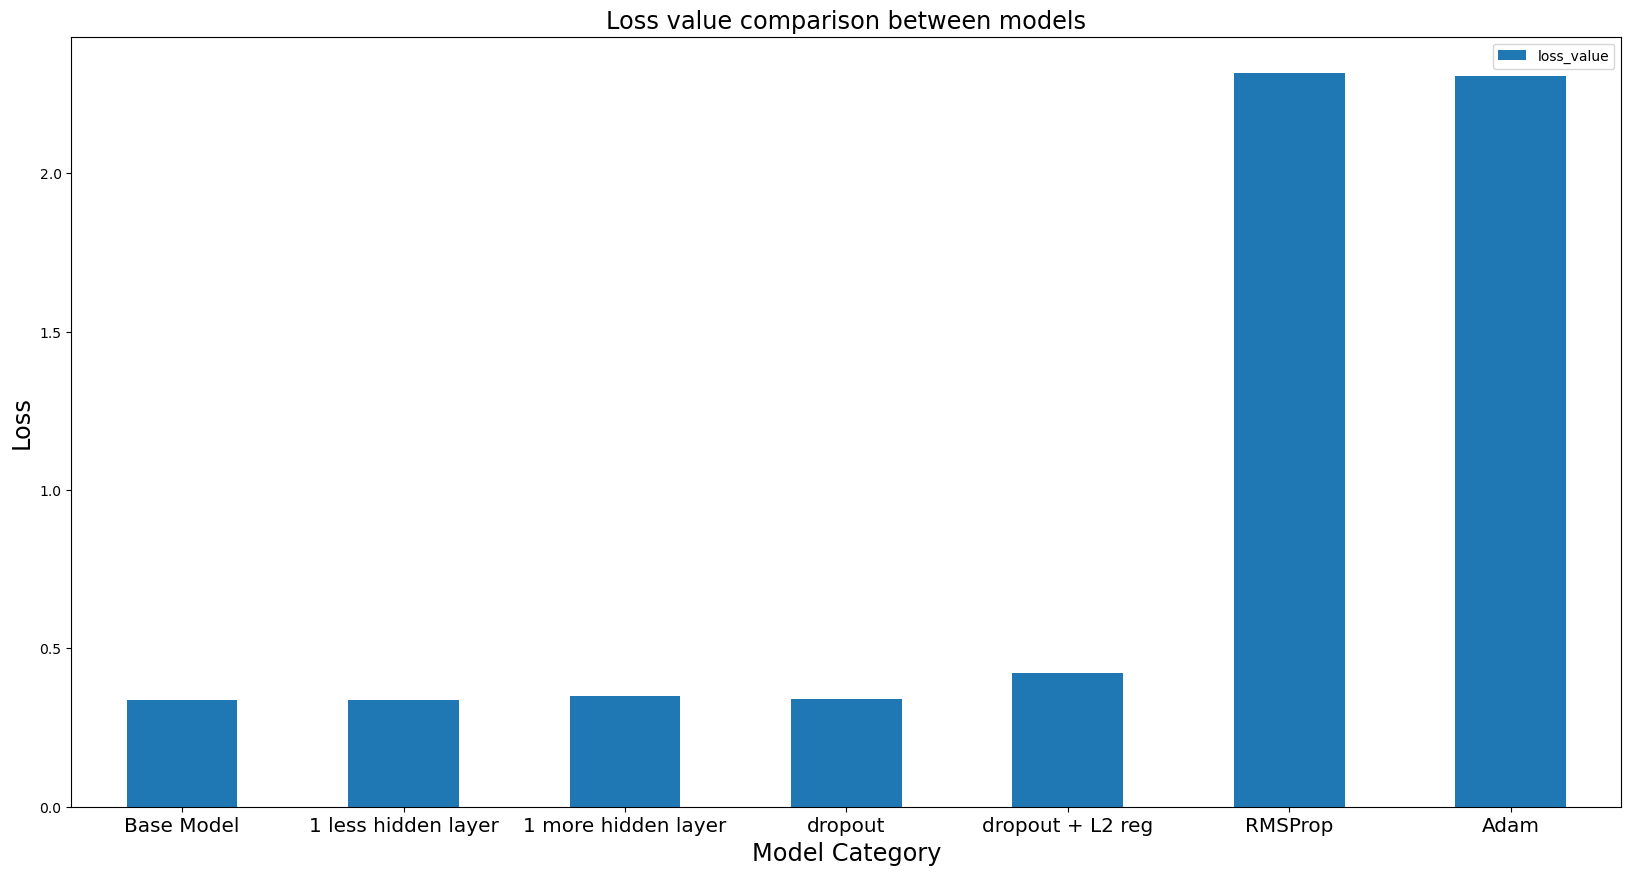

In [57]:
# bar plot to show loss comparison between different models
y = [loss, loss1, loss2, loss3, loss4, loss5, loss6]
x = ["Base Model", "1 less hidden layer", "1 more hidden layer", "dropout", "dropout + L2 reg", "RMSProp", "Adam"]
# Create DataFrame from the counts summary to plot the distribution
model_data = {
    'model_category': x,
    'loss_value': y
}
model_df = pd.DataFrame(model_data)
plt = model_df.plot(x='model_category',
        kind='bar',
        stacked=False,
        title='Loss value comparison between models',
        figsize=(20, 10))
plt.set_ylabel("Loss",fontsize="xx-large")
plt.set_xlabel("Model Category",fontsize="xx-large")
plt.set_title('Loss value comparison between models', fontsize="xx-large")
plt.set_xticklabels(model_df["model_category"],rotation=0, fontsize="x-large")


#### From the accuracy perspective on the test data, all the models are giving accuracy of around 88%, except for models that are trained using Adam or RMSprop optimizer. The best is model with increased hidden layer. From loss perspective, the best model is which is having the lowest loss value, is the model with decreased layer. The most important thing to note is accuracy and loss value are very close for all the models except for models trained using Adam or RMSprop optimizer

### NOTE


All Late Submissions will incur a <b>penalty of -2 marks </b>. So submit your assignments on time.

Good Luck